#THE LOOK Sales Department


---

###Table of Content

1.   Data Understanding
2.   Exploration Data Analysis
3.   Modeling
4.   Model Evaluation

*-- Assumption Note:*

* The Look started operating in 2019.

><p align ='justify'>Sales forecasts are very important to increase sales and marketing of an e-commerce. In addition, sales data can also best reflec for sales trends. In a study conducted by (Liu, Liu, Zhang, & Xu, 2018), it was found that the time series model has a good effect on predicting sales.
FB Prophet is developed to meet forecasting need from the business point of view. 
It has the following characteristics:
<ul>
<li>Time series data observed on an hourly, daily, and monthly basis for a year or more.</li>
<li>It takes care of trends, outlier detection, missing data, etc.</li>
</ul></p>

>FB Prophet models:
y(t)=g(t)+h(t)+ s(t)+et<br>
y(t) -> additive regressive model<br>
g(t) -> the trend factor<br>
h(t) -> holiday component<br>
s(t) -> seasonality component<br>
et -> error terms<br>
(Jha & Pande, 2021).

><p align ='justify'>Sarima model is superposed with the result of Prophet model according to the corresponding weight, and the prediction result of combined model is obtained. Prophet-SARIMA combined forecasting model can predict the sales volume of product more accurately and provide more scientific basis for the supplement planning of e-commerce enterprice (Zhao & Zhang, 2020).</p>

---
<p align ='justify'>
1.  Jha, B., & Pande, S. (2021). Time Series Forecasting Model for Supermarket Sales using FB-Prophet. Proceeding of the Fifth International Conference on Computing Methodologies and Communication (ICCMC), 547-554. doi:10.1109/ICCMC51019.2021.9418033<br>
2.  Liu, J., Liu, C., Zhang, L., & Xu, Y. (2018). Research on Sales Information Prediction System of e-Commerce Enterprises Based on Time Series Model. Infomration System and e-Business Management, 18, 823–836. doi:10.1007/s10257-019-00399-7<br>
3.  Zhao, J., & Zhang, C. (2020). Research on Sales Forecast Based on Prophet-SARIMA Combination Model. Journal of Physics : Conference Series, 1616. doi:10.1088/1742-6596/1616/1/012069<br>
</p>



##Data Understanding

###Import Data

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final_project/data_primer.csv')

### Understanding the Data

In [ ]:
data.head(2)

,id,order_id,user_id,gender,product_id,category,name,brand,department,shipping_status,shipping_company,order_date,shipping_time,num_of_item,price,revenue
0,1,1,1,M,16783,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,Men,Complete,Houston TX,2019-07-20 14:29:35+00:00,4.0,4,55.00,220.0
1,2,1,1,M,21357,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,Men,Complete,Mobile AL,2019-07-21 16:59:28+00:00,4.0,4,68.95,275.8


In [ ]:
data.shape

(180508, 16)

*we have 180508 rows and 16 columns*

In [ ]:
del data['id']
del data['order_id']
del data['product_id']

*delete the unnecessary columns*

In [ ]:
data.head(2)

,user_id,gender,category,name,brand,department,shipping_status,shipping_company,order_date,shipping_time,num_of_item,price,revenue
0,1,M,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,Men,Complete,Houston TX,2019-07-20 14:29:35+00:00,4.0,4,55.00,220.0
1,1,M,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,Men,Complete,Mobile AL,2019-07-21 16:59:28+00:00,4.0,4,68.95,275.8


In [ ]:
data.describe()

,user_id,shipping_time,num_of_item,price,revenue
count,180508.000000,63035.000000,180508.000000,180508.000000,180508.000000
mean,50171.351602,2.501245,1.894021,59.799867,113.315381
std,28839.688216,1.502653,1.058109,65.844662,155.778169
min,1.000000,0.000000,1.000000,0.020000,0.020000
25%,25249.750000,1.000000,1.000000,24.900000,34.000000
50%,50273.000000,3.000000,2.000000,39.990000,65.755000
75%,75175.000000,4.000000,2.000000,69.950000,133.000000
max,100000.000000,5.000000,4.000000,999.000000,3996.000000


In [ ]:
data[data.duplicated()].sum().T

user_id             0.0
gender              0.0
category            0.0
name                0.0
brand               0.0
department          0.0
shipping_status     0.0
shipping_company    0.0
order_date          0.0
shipping_time       0.0
num_of_item         0.0
price               0.0
revenue             0.0
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           180508 non-null  int64  
 1   gender            180508 non-null  object 
 2   category          180508 non-null  object 
 3   name              180496 non-null  object 
 4   brand             180365 non-null  object 
 5   department        180508 non-null  object 
 6   shipping_status   180508 non-null  object 
 7   shipping_company  180508 non-null  object 
 8   order_date        180508 non-null  object 
 9   shipping_time     63035 non-null   float64
 10  num_of_item       180508 non-null  int64  
 11  price             180508 non-null  float64
 12  revenue           180508 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 17.9+ MB


In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])
print(data.dtypes)

user_id                           int64
gender                           object
category                         object
name                             object
brand                            object
department                       object
shipping_status                  object
shipping_company                 object
order_date          datetime64[ns, UTC]
shipping_time                   float64
num_of_item                       int64
price                           float64
revenue                         float64
dtype: object


In [ ]:
def augment_data(data):
  data['order_year'] = data['order_date'].dt.year
  data['order_month'] = data['order_date'].dt.month
  data['order_hour'] = data['order_date'].dt.hour
  return data
data = augment_data(data)
data.head(2)

,user_id,gender,category,name,brand,department,shipping_status,shipping_company,order_date,shipping_time,num_of_item,price,revenue,order_year,order_month,order_hour
0,1,M,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,Men,Complete,Houston TX,2019-07-20 14:29:35+00:00,4.0,4,55.00,220.0,2019,7,14
1,1,M,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,Men,Complete,Mobile AL,2019-07-21 16:59:28+00:00,4.0,4,68.95,275.8,2019,7,16


####Null items

In [ ]:
data.isnull().sum()

user_id                  0
gender                   0
category                 0
name                    12
brand                  143
department               0
shipping_status          0
shipping_company         0
order_date               0
shipping_time       117473
num_of_item              0
price                    0
revenue                  0
order_year               0
order_month              0
order_hour               0
dtype: int64

In [ ]:
data[['name','brand']] = data[['name','brand']].fillna('unknown')

In [ ]:
data.isnull().sum()

user_id                  0
gender                   0
category                 0
name                     0
brand                    0
department               0
shipping_status          0
shipping_company         0
order_date               0
shipping_time       117473
num_of_item              0
price                    0
revenue                  0
order_year               0
order_month              0
order_hour               0
dtype: int64

####*What in the columns*

In [ ]:
categorical = data.select_dtypes(['category','object']).columns
for col in categorical:
  print('{} : {} unique value(S)'.format(col, data[col].nunique()))

gender : 2 unique value(S)
category : 26 unique value(S)
name : 27248 unique value(S)
brand : 2755 unique value(S)
department : 2 unique value(S)
shipping_status : 5 unique value(S)
shipping_company : 10 unique value(S)


In [ ]:
data['gender'].value_counts()

M    90501
F    90007
Name: gender, dtype: int64

In [ ]:
data['shipping_company'].value_counts()

Memphis TN                                     24056
Chicago IL                                     23846
Houston TX                                     22801
Mobile AL                                      18364
Los Angeles CA                                 17355
Philadelphia PA                                16681
Port Authority of New York/New Jersey NY/NJ    16343
Charleston SC                                  16289
New Orleans LA                                 12909
Savannah GA                                    11864
Name: shipping_company, dtype: int64

In [ ]:
data['shipping_status'].value_counts()

Shipped       54467
Complete      45283
Processing    36225
Cancelled     26781
Returned      17752
Name: shipping_status, dtype: int64

In [ ]:
data['department'].value_counts()

Men      90501
Women    90007
Name: department, dtype: int64

In [ ]:
data['category'].value_counts()

Intimates                        13432
Jeans                            12719
Fashion Hoodies & Sweatshirts    11853
Tops & Tees                      11779
Swim                             11172
Sleep & Lounge                   11167
Sweaters                         11090
Shorts                           11014
Accessories                       9817
Active                            9136
Outerwear & Coats                 9014
Underwear                         7621
Pants                             7122
Socks                             6083
Dresses                           5365
Suits & Sport Coats               5154
Maternity                         5013
Plus                              4226
Socks & Hosiery                   3814
Pants & Capris                    3398
Leggings                          3174
Blazers & Jackets                 3125
Skirts                            2069
Suits                             1046
Jumpsuits & Rompers                885
Clothing Sets            

##Exploration Data Analysis

In [ ]:
data.corr()['revenue'].sort_values()

shipping_time   -0.002726
order_month     -0.000636
user_id          0.000582
order_hour       0.001939
order_year       0.005714
num_of_item      0.406939
price            0.798722
revenue          1.000000
Name: revenue, dtype: float64

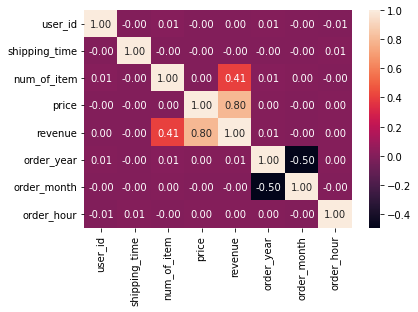

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

###Shipping 

*knowing whether the shipping time is efficient or not*

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Final_project/data_com2.csv')

*processed in MySQL*

In [ ]:
data2.isnull().sum()

id                   0
order_id             0
user_id              0
category             0
name                 2
brand               35
shipping_status      0
shipping_company     0
order_date           0
shipping_time        0
num_of_item          0
price                0
revenue              0
dtype: int64

In [ ]:
data2[['name','brand']] = data[['name','brand']].fillna('unknown')

In [ ]:
data2.isnull().sum()

id                  0
order_id            0
user_id             0
category            0
name                0
brand               0
shipping_status     0
shipping_company    0
order_date          0
shipping_time       0
num_of_item         0
price               0
revenue             0
dtype: int64

In [ ]:
data2['shipping_time'].mean()

2.4964556235231763

*  62 percent of US customers describe 'fast shipping speed' as the most important factor when defining positive experiences with digital brands (Law, Thomas J. 2021). According to 2021 survey, US consumers expected their online delivery to take two to three days (Chevalier, Stephanie. 2021).
*  The average of The Look Shipping Time are around 2 days of shipment.
*  The average shipping time from The Look is efficient.

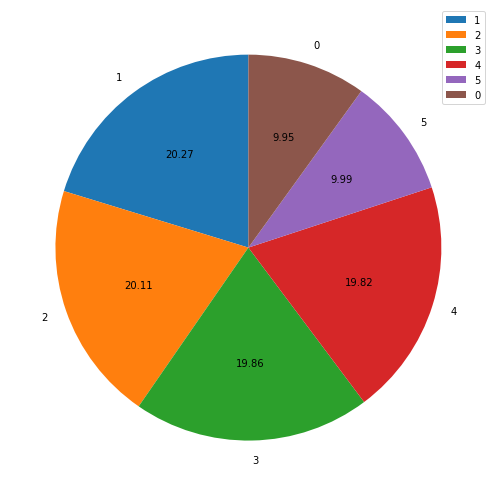

In [ ]:
labels = (1,2,3,4,5,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data2['shipping_time'].sort_values(ascending=True).value_counts(normalize=True) *100, 
        labels=labels, autopct='%1.2f', startangle=90)
plt.tight_layout()
axesObject='equal'
plt.legend()
plt.show()

*  Same-day = 9.95 percent
*  Next-day = 20.27 percent
*  2-3 days = 29.97 percent
*  4-5 days = 29.81 percent

In [ ]:
data2.groupby(['shipping_time']).count()

,id,order_id,user_id,category,name,brand,shipping_status,shipping_company,order_date,num_of_item,price,revenue
shipping_time,,,,,,,,,,,,
0,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505,4505
1,9178,9178,9178,9178,9178,9178,9178,9178,9178,9178,9178,9178
2,8976,8976,8976,8976,8976,8976,8976,8976,8976,8976,8976,8976
3,9105,9105,9105,9105,9105,9105,9105,9105,9105,9105,9105,9105
4,8993,8993,8993,8993,8993,8993,8993,8993,8993,8993,8993,8993
5,4526,4526,4526,4526,4526,4526,4526,4526,4526,4526,4526,4526


<Figure size 1584x720 with 0 Axes>

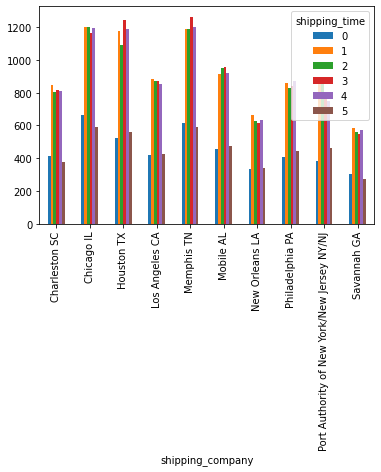

<Figure size 1584x720 with 0 Axes>

In [ ]:
pd.crosstab(data2['shipping_company'],data2['shipping_time']).plot.bar()
plt.figure(figsize=(22,10))

In [ ]:
data2.groupby(by=['shipping_company'])['user_id'].sum().sort_values(ascending=False)

shipping_company
Memphis TN                                     304730045
Chicago IL                                     301889143
Houston TX                                     288732487
Mobile AL                                      233929925
Los Angeles CA                                 218027543
Philadelphia PA                                215815415
Port Authority of New York/New Jersey NY/NJ    207403208
Charleston SC                                  204906467
New Orleans LA                                 164162182
Savannah GA                                    142732136
Name: user_id, dtype: int64

*When viewed from the selection of shipping companies, users mostly use Memphis TN, Chicago IL, then Houston TX.* 

###Sales Performance

*  *To know the year with the highest sales and how many numbers were generated in that year*

Intimates                        3384
Jeans                            3209
Fashion Hoodies & Sweatshirts    2962
Tops & Tees                      2961
Sleep & Lounge                   2850
Sweaters                         2808
Shorts                           2715
Swim                             2708
Accessories                      2512
Active                           2242
Outerwear & Coats                2227
Underwear                        1934
Pants                            1833
Socks                            1492
Dresses                          1323
Suits & Sport Coats              1297
Maternity                        1269
Plus                             1061
Socks & Hosiery                   985
Pants & Capris                    867
Leggings                          801
Blazers & Jackets                 797
Skirts                            484
Suits                             280
Jumpsuits & Rompers               228
Clothing Sets                      54
Name: catego

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


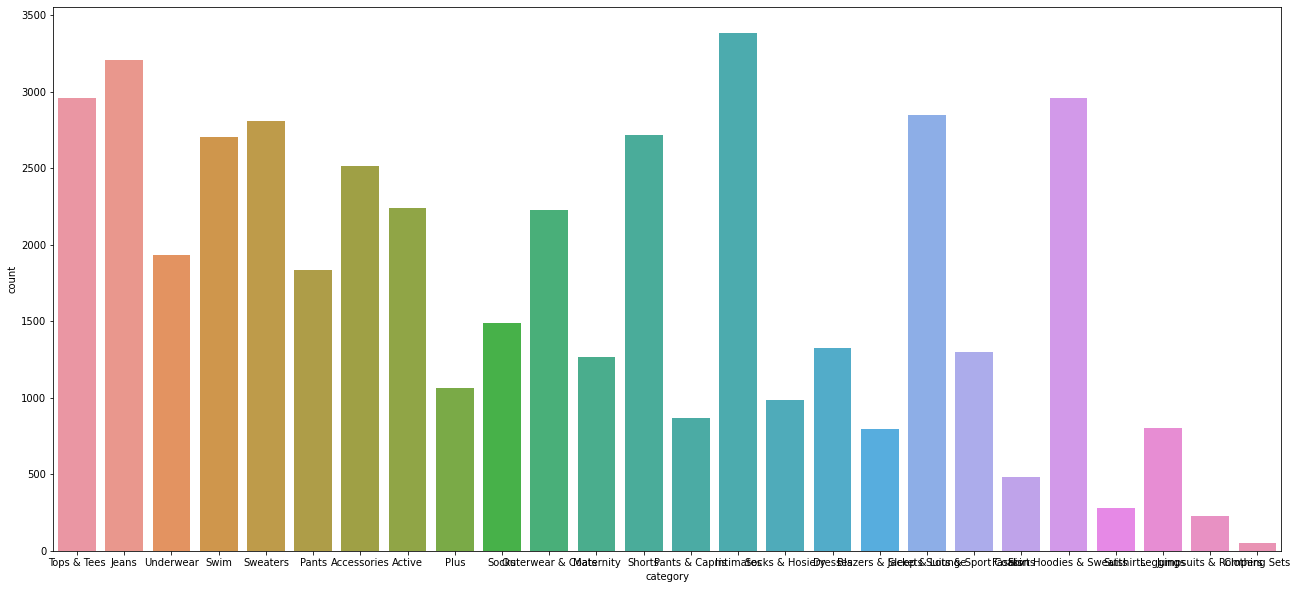

In [ ]:
print(data2['category'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(data2['category'])
plt.show()

*The categories with the most purchases were Intimates, Jeans, then Fashion Hoodies & Sweatshirts*

In [ ]:
data2['order_date'] = data['order_date'].astype('datetime64[ns]')
print(data2.dtypes)

id                           int64
order_id                     int64
user_id                      int64
category                    object
name                        object
brand                       object
shipping_status             object
shipping_company            object
order_date          datetime64[ns]
shipping_time                int64
num_of_item                  int64
price                      float64
revenue                    float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  """Entry point for launching an IPython kernel.


In [ ]:
def augment_data(data2):
  data2['order_year'] = data2['order_date'].dt.year
  data2['order_month'] = data2['order_date'].dt.month
  data2['order_hour'] = data2['order_date'].dt.hour
  return data2
data2 = augment_data(data2)
data2.head(2)

,id,order_id,user_id,category,name,brand,shipping_status,shipping_company,order_date,shipping_time,num_of_item,price,revenue,order_year,order_month,order_hour
0,1,1,1,Tops & Tees,Calvin Klein Sportswear Men's Slim Fit Longsle...,Calvin Klein,Complete,Houston TX,2019-07-20 14:29:35,4,4,55.00,220.0,2019,7,14
1,2,1,1,Jeans,RVCA Spanky II Denim Pant - Men's,RVCA,Complete,Mobile AL,2019-07-21 16:59:28,4,4,68.95,275.8,2019,7,16


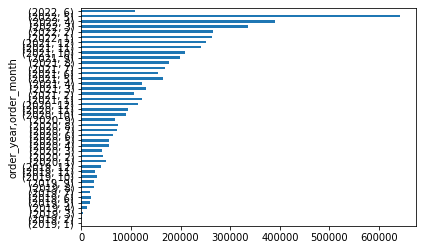

In [ ]:
zz = data2.groupby(by=['order_year','order_month'])['revenue'].sum()
ax = zz.plot.barh(rot=0)

*Sales performance when viewed from the monthly revenue*

In [ ]:
mr = pd.DataFrame(zz)
print(mr)

                          revenue
order_year order_month           
2019       1               179.70
           2              2436.79
           3              2914.79
           4             11033.85
           5             16866.24
           6             20546.28
           7             17334.93
           8             25691.95
           9             26190.51
           10            31841.70
           11            28457.91
           12            40206.65
2020       1             50359.15
           2             43939.21
           3             40848.89
           4             56779.08
           5             56907.44
           6             64215.45
           7             72947.71
           8             74853.83
           9             68247.57
           10            89660.57
           11            95052.33
           12           114941.32
2021       1            121627.05
           2            107096.82
           3            131152.73
           4  

In [ ]:
import matplotlib.pyplot as plt

numpy.ndarray

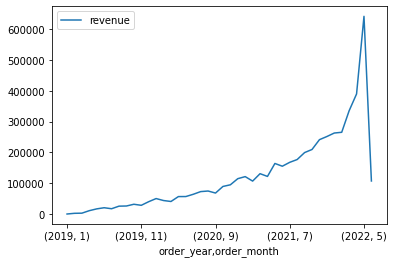

In [ ]:
axes = mr.plot.line(subplots=True)
type(axes)

*Does the 6th month have to be removed? because in this data, the 6th month has not been fully completed so the sales data is only at the beginning of the 6th month of 2022.*

In [ ]:
data2n = data2.drop(data2[(data2['order_year']==2022) & (data2['order_month']==6)].index)

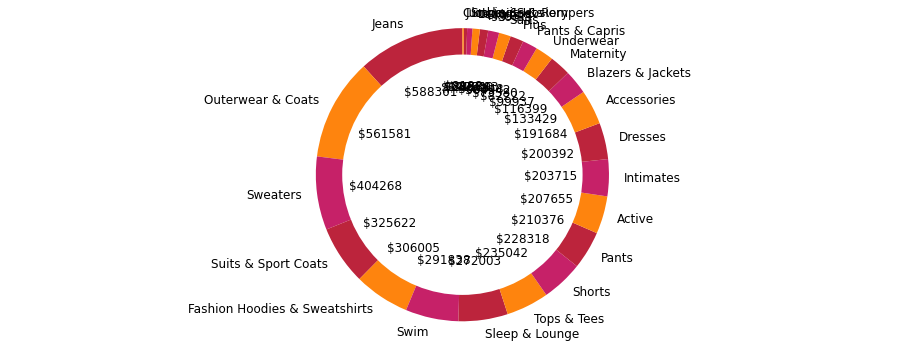

In [ ]:
top_category = data2n.groupby(['category']).sum().sort_values('revenue',ascending=False)
top_category = top_category[['revenue']]
total_revenue_cat = top_category['revenue'].sum()
total_revenue_cat = str(int(total_revenue_cat))
total_revenue_cat = '$' + total_revenue_cat
top_category.reset_index(inplace=True)

plt.rcParams['figure.figsize'] = (13,5)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct*total/100))
    return '${v:d}'.format(v=val)
  return my_format
colors = ['#BC243C','#FE840E','#C62168']

fig1,ax1 = plt.subplots()
ax1.pie(top_category['revenue'],colors=colors,labels=top_category['category'],autopct=autopct_format(top_category['revenue']),startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white')

fig= plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
mrc = data2n.groupby(by=['order_year','order_month'])['revenue'].sum()
print(mrc)

order_year  order_month
2019        1                 179.70
            2                2436.79
            3                2914.79
            4               11033.85
            5               16866.24
            6               20546.28
            7               17334.93
            8               25691.95
            9               26190.51
            10              31841.70
            11              28457.91
            12              40206.65
2020        1               50359.15
            2               43939.21
            3               40848.89
            4               56779.08
            5               56907.44
            6               64215.45
            7               72947.71
            8               74853.83
            9               68247.57
            10              89660.57
            11              95052.33
            12             114941.32
2021        1              121627.05
            2              107096.82
            3 

numpy.ndarray

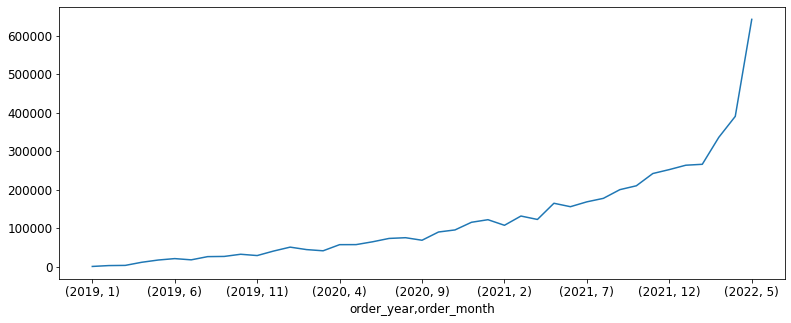

In [ ]:
axes = mrc.plot.line(subplots=True)
type(axes)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

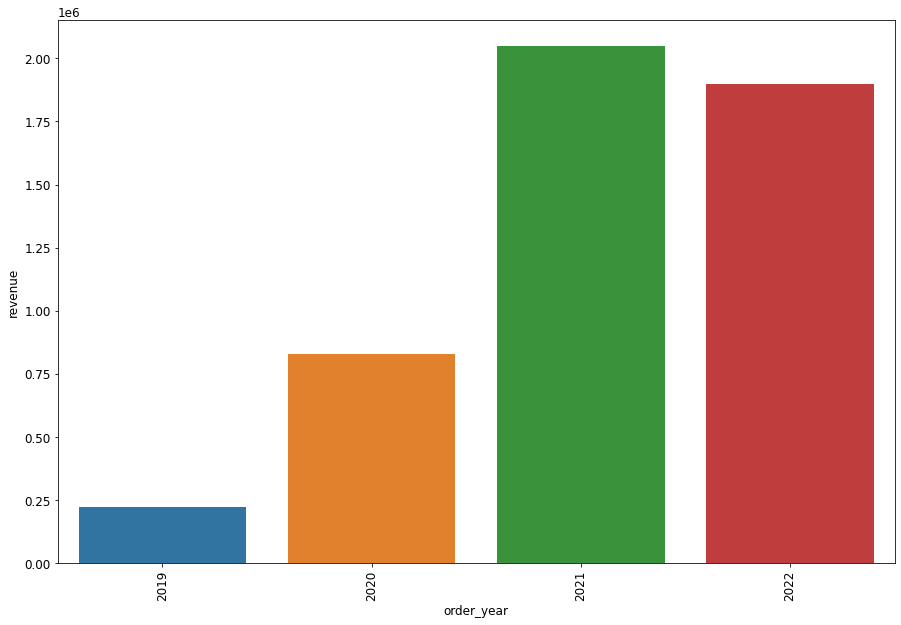

In [ ]:
data_year = data2n.groupby(by=['order_year'])['revenue'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='order_year',y='revenue',data=data_year)
plt.xticks(rotation=90)

In [ ]:
data2n.groupby(by=['user_id'])['revenue'].sum().mean()

183.86909739590993

*The average revenue obtained from each customer is 183.87.*

In [ ]:
data2n.groupby(by=['user_id'])['num_of_item'].sum().mean()

3.0874650581138736

*The average of order size per customer are 3 items*

In [ ]:
average_deal_size = (data2['revenue'].sum()) / (data2['revenue'].count())
print(average_deal_size)

112.7680100700042


*Average deal size (the average dollar amount generated per closed deal) = 112.77*

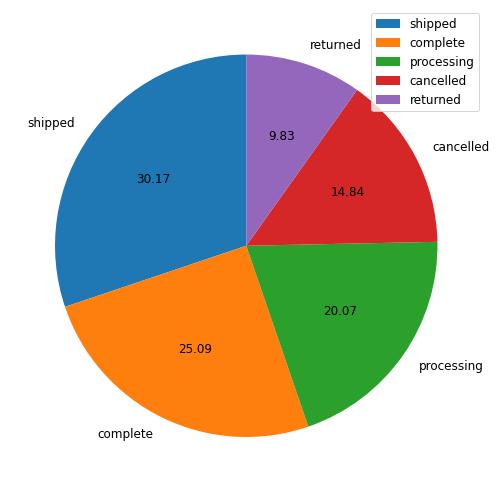

In [ ]:
labels = ('shipped','complete','processing','cancelled','returned')
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['shipping_status'].value_counts(normalize=True) *100, 
        labels=labels, autopct='%1.2f', startangle=90)
plt.tight_layout()
axesObject='equal'
plt.legend()
plt.show()

*Win Rate (percentage of the total number of quoted deals that turn into sales) = 25.09 percent*

Shipped       54467
Complete      45283
Processing    36225
Cancelled     26781
Returned      17752
Name: shipping_status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


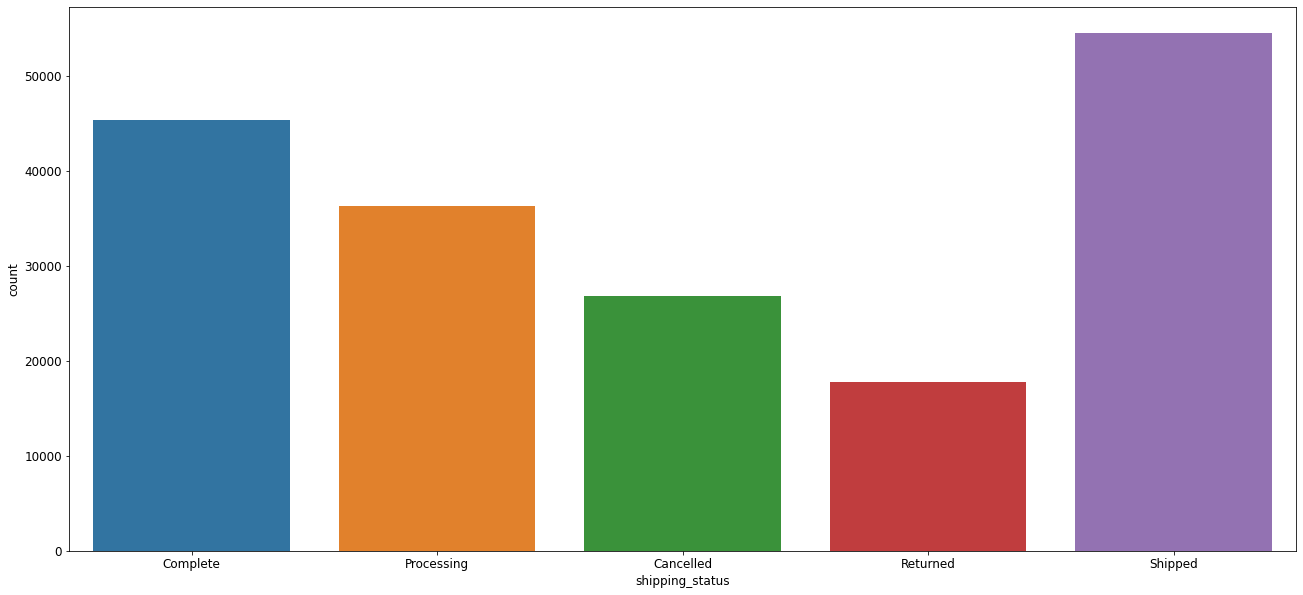

In [ ]:
print(data['shipping_status'].value_counts())
plt.figure(figsize=(22,10))
sns.countplot(data['shipping_status'])
plt.show()

In [ ]:
churn_rate = (26781 / (data['user_id'].count()))*100
print(churn_rate)

14.83646154187072


*cancel rate (percentage of customers who cancel for company's product) = 14.84 percent*

###Customer

In [ ]:
data['user_id'].value_counts()

88753    13
85684    13
61518    13
370      12
87276    12
         ..
28282     1
28279     1
65223     1
28278     1
49996     1
Name: user_id, Length: 79986, dtype: int64

In [ ]:
repeat_purchase = (data['user_id'].value_counts() > 1).sum()
print(repeat_purchase)

44830


In [ ]:
first_purchase = (data['user_id'].value_counts() == 1).sum()
print(first_purchase)

35156


*We assume that the user_id that exists twice or more is a customer who has made a repeat order and the user_id that appears only once is a new customer.*

**Assumed that The Look only opened in 2019 according to the initial year in the data**

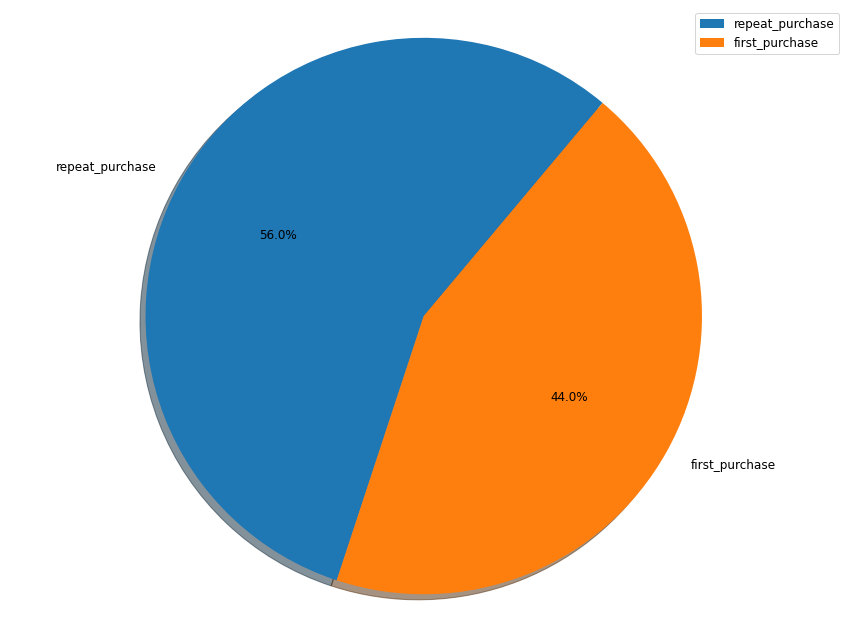

In [ ]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,9))
ax1.pie([(data['user_id'].value_counts() > 1).sum(),(data['user_id'].value_counts() == 1).sum()], labels=['repeat_purchase','first_purchase'],
        autopct='%1.1f%%', shadow=True, startangle=50)
ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show() 

*As of 2022, The Look has 56 percent of repeat purchaser, so it can be said that The Look is in Hybrid Mode. Where Hybrid Mode is achieved if e-commerce has 40 to 60 percent returning customers.*

In [ ]:
customer_value = data.groupby(['user_id'])['revenue'].sum()
cv = pd.DataFrame(
    customer_value
)

In [ ]:
cv.sort_values(by=['revenue'],ascending=False)

,revenue
user_id,
22881,6875.36
3191,6418.87
54215,5049.10
35291,4792.74
65933,4751.23
...,...
90918,1.51
96477,1.51
67560,1.50


*Revenue earned from each customer*

In [ ]:
(cv.sort_values(by=['revenue'],ascending=False)).head(25)

,revenue
user_id,
22881,6875.36
3191,6418.87
54215,5049.10
35291,4792.74
65933,4751.23
94538,4690.58
82141,4676.55
32018,4603.70
53961,4557.60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

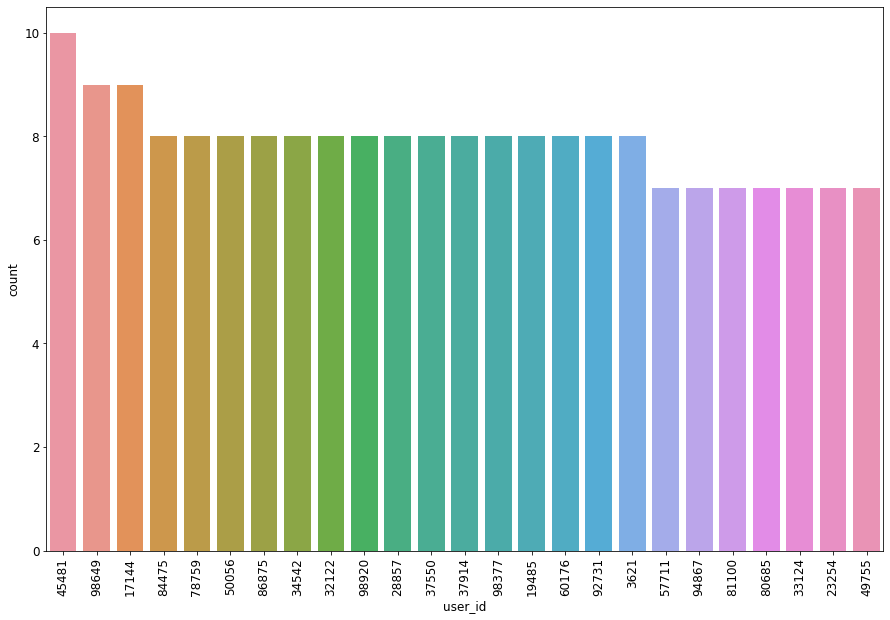

In [ ]:
top_cus = data2n.groupby(by=['user_id'])['revenue'].count().sort_values(ascending=False).head(25)
top_cus = pd.DataFrame(top_cus).reset_index()
plt.figure(figsize=(15,10))
sns.countplot(x='user_id',data=data2n,order=data2n.groupby(by=['user_id'])['revenue'].count().sort_values(ascending=False).iloc[:25].index)
plt.xticks(rotation=90)

In [ ]:
customer_os = data.groupby(['user_id'])['num_of_item'].sum()
cos = pd.DataFrame(
    customer_os
)

In [ ]:
cos.sort_values(by=['num_of_item'],ascending=False)

,num_of_item
user_id,
61518,49
88753,49
86875,48
85684,45
33176,42
...,...
67579,1
67580,1
67582,1


*Order size each customer*

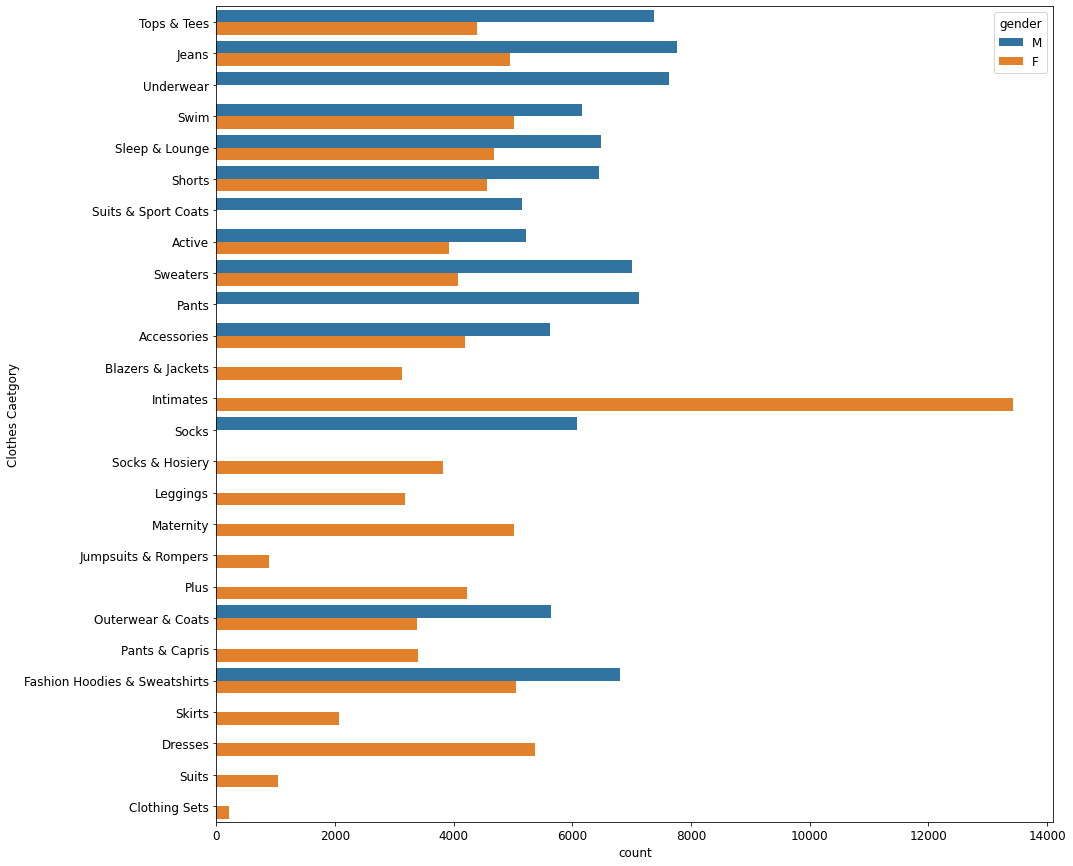

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y='category',hue='gender',data=data)
plt.xlabel('count')
plt.ylabel('Clothes Caetgory')
plt.show()

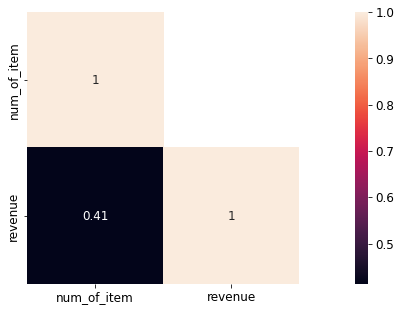

In [ ]:
cor1 = data2n[['num_of_item','revenue']]
data_cat = pd.get_dummies(cor1)
cor_mat = data_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

##Data Analysis

###Time Series Plot

In [ ]:
data2n.sort_values(by=['order_date'],inplace=True,ascending=True)
data2n.set_index('order_date',inplace=True)

In [ ]:
sal_data = pd.DataFrame(data2n['revenue'])
sal_data

,revenue
order_date,
2019-01-20 11:29:34.000000,34.99
2019-01-20 12:06:13.000000,59.50
2019-01-21 12:27:31.000000,65.00
2019-01-22 13:51:12.000000,20.21
2019-02-01 22:37:53.000000,205.80
...,...
2022-05-31 23:42:44.000000,31.50
2022-05-31 23:43:43.649414,179.85
2022-05-31 23:44:47.404101,119.04


*checking stationarity*

In [ ]:
sal_data = pd.DataFrame(sal_data['revenue'].resample('D').mean())
sal_data = sal_data.interpolate(method='linear')

In [ ]:
train, test, validate = np.split(sal_data['revenue'].sample(frac=1), 
                                 [int(.6*len(sal_data['revenue'])),
                                  int(.8*len(sal_data['revenue']))])

In [ ]:
print('Train Dataset : ')
print(train)
print('Test Dataset : ')
print(test)
print('Validate Dataset : ')
print(validate)

Train Dataset : 
order_date
2019-06-07     82.583333
2022-03-31    101.781224
2020-01-21    140.571000
2022-05-21    111.514615
2020-01-20     80.540000
                 ...    
2020-01-04     49.146000
2021-03-28     87.470000
2020-03-13     62.293750
2021-02-17    163.887667
2021-08-07    106.143000
Name: revenue, Length: 736, dtype: float64
Test Dataset : 
order_date
2022-04-28    108.728279
2019-06-04    276.956667
2020-11-04    117.288788
2021-11-11    131.934000
2021-08-01    106.240364
                 ...    
2021-03-22     86.005000
2020-10-16    102.120000
2020-01-23     86.176667
2020-03-07    123.554615
2020-05-12    215.772778
Name: revenue, Length: 246, dtype: float64
Validate Dataset : 
order_date
2021-11-03     95.938367
2021-03-10     77.424000
2022-05-27    107.488750
2019-07-02     98.402500
2020-12-17    118.733704
                 ...    
2020-02-22     50.031053
2020-07-27     98.435625
2019-05-23     99.193333
2021-08-02    112.597600
2020-06-19    118.446111
Nam

In [ ]:
x1, x2, x3 = train.mean(), test.mean(), validate.mean()
v1, v2, v3 = train.var(), test.var(), validate.var()
print('Mean : ')
print(x1,x2,x3)
print('Variance : ')
print(v1,v2,v3)

Mean : 
109.72570995805386 110.1821072594066 108.81645526481124
Variance : 
1825.0657306484904 1454.274673518175 1385.9172828697556


####Augmented Dicky Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(sal_data['revenue'])
print(adf)
print('\nADF = ', str(adf[0]))
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): 
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-5.230683995136985, 7.608629005048562e-06, 23, 1204, {'1%': -3.4357929374222222, '5%': -2.86394352510997, '10%': -2.5680496786183373}, 12291.383169361778)

ADF =  -5.230683995136985

p-value =  7.608629005048562e-06

Critical Values: 
1% : -3.4357929374222222
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.86394352510997
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.5680496786183373
Null Hypothesis Rejected. Time Series is Stationary


*This time series data already stationary where 99%, 95%, and 90% tests suggest that the null hypothesis is rejected.*

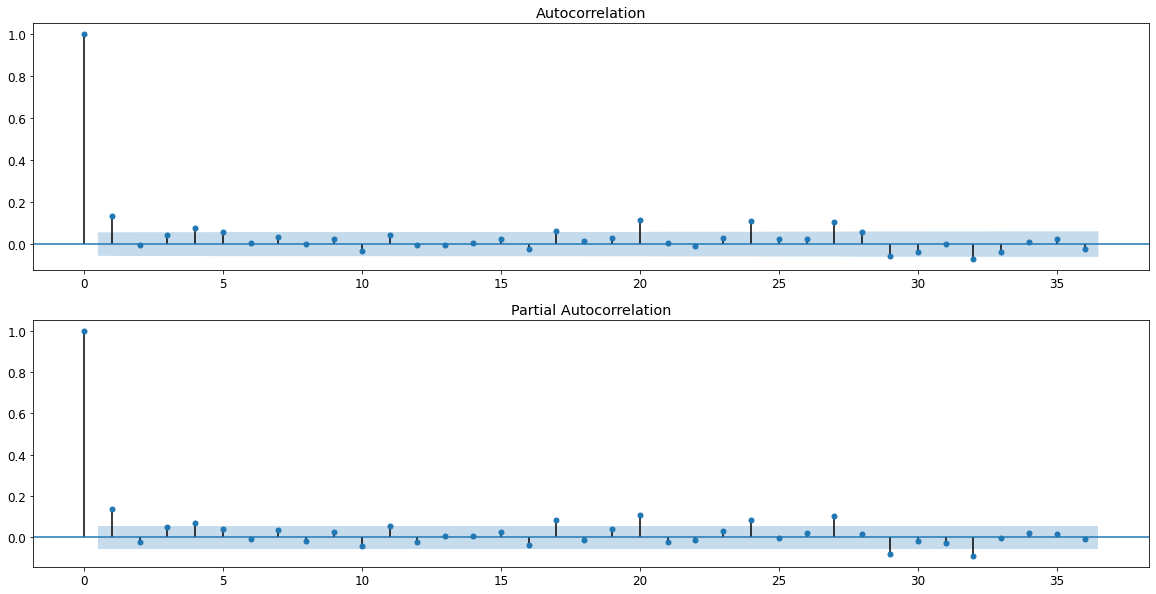

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,ax = plt.subplots(2,1,figsize=(20,10))
plot_acf(sal_data,lags=36,ax=ax[0])
plot_pacf(sal_data,lags=36,ax=ax[1])
plt.show()

*to check the lag correlation* (lags are simply delays in time steps within a series).<br>
measure of correlated date at time t to its past value.

In [ ]:
from pandas.plotting import lag_plot

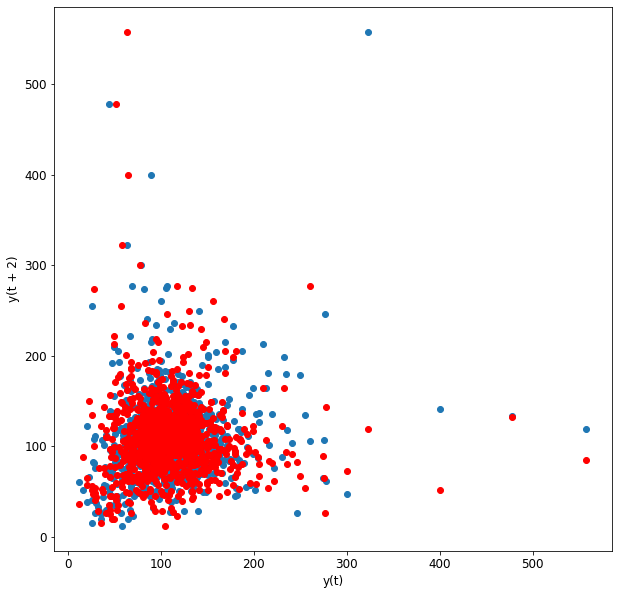

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = lag_plot(sal_data,lag=1)
ax = lag_plot(sal_data,lag=2,c='red')

####Decomposition

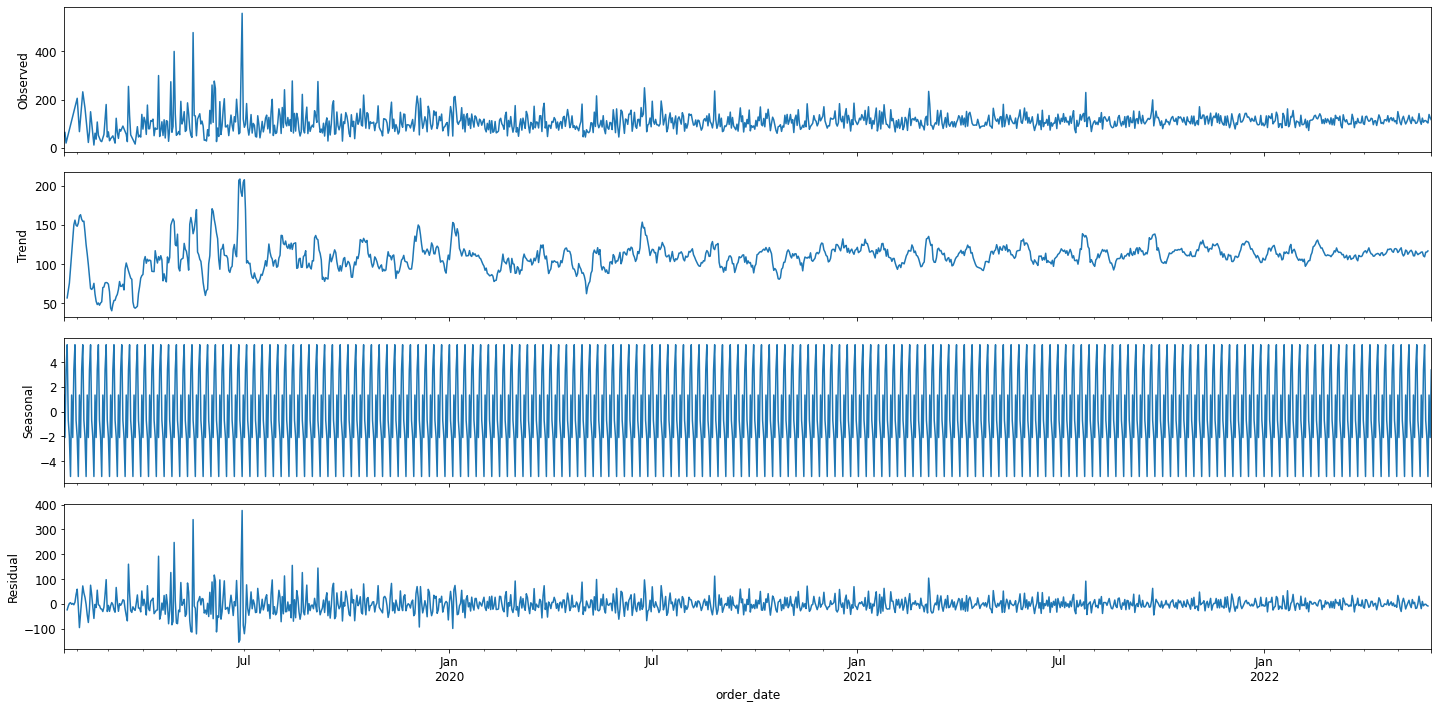

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(sal_data, model='additive')
fig = decomposition.plot()
plt.show();

##Modeling

In [ ]:
import itertools

In [ ]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


p-> autoregressive order <br>
d -> differencing order <br>
q -> moving average order

In [ ]:
for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(sal_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:15170.39421600017
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:14288.074300549812
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14288.074300549812
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:13245.303588775667
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

In [ ]:
mod = sm.tsa.statespace.SARIMAX(sal_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit() 
print(results.summary().tables[1]) 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1094      0.020      5.452      0.000       0.070       0.149
ma.L1         -1.0000      9.131     -0.110      0.913     -18.896      16.896
ar.S.L12      -0.0035      0.006     -0.609      0.542      -0.015       0.008
ma.S.L12      -1.0210      0.022    -46.342      0.000      -1.064      -0.978
sigma2      1552.5909   1.42e+04      0.110      0.913   -2.62e+04    2.93e+04


**SARIMAX Model Evaluation**

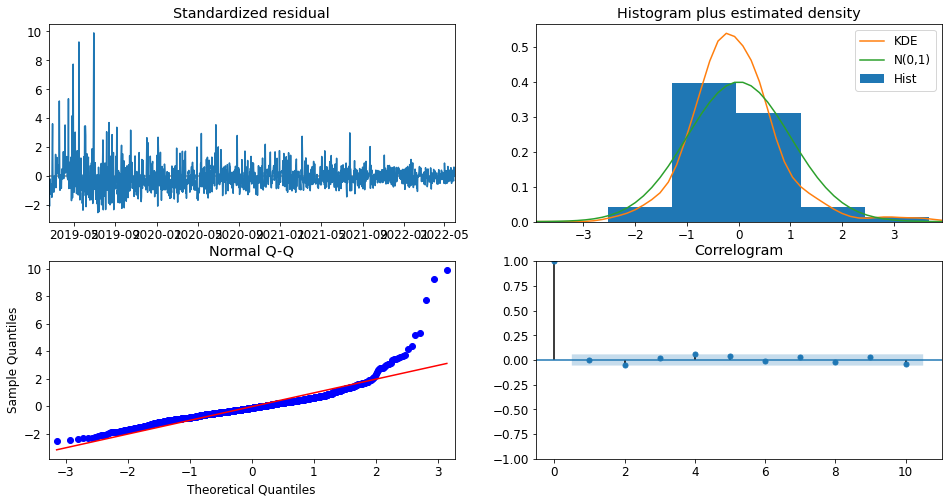

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

1.  Standarized residual, there are no obvious patterns in the residuals
2.  Histogram plus estimated density, should be similiar to the normal distribution
3.  Normal Q-Q, the point must lie on the straight line
4.  Correlogram, 95 percent of correlations for lag greater than one shouldn't be significant 

This figure could shows the outliers for the ARIMA model. Standarized residual indicates the forecasted errors in terms of variations in the curve. especially for the Normal Q-Q that shows the scatter plot for two sets of quantiles, the graph indicates the standard residual that is the strength of the obserbved and predicted values.

For the sake of goodness of fit, the standard assumption: they sould be normally distributed around 0 or white noise. In the plot, residual seem to be normally distributed around 0 with slightly heavy tail.

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-20'), dynamic=False) 
pred_val = pred.conf_int()

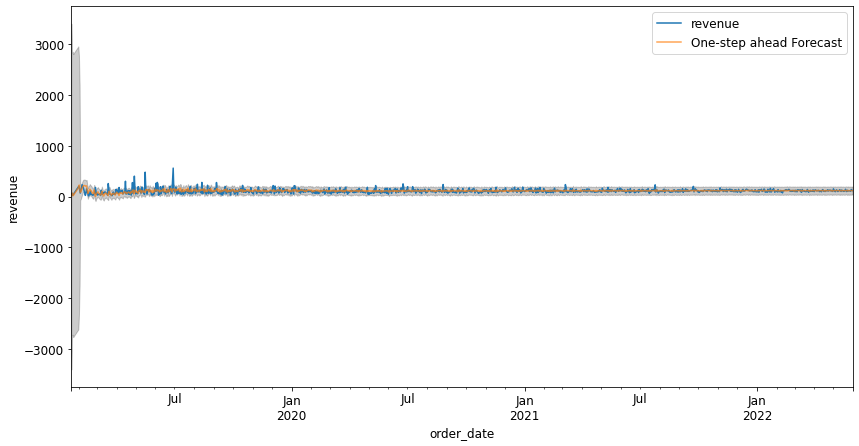

In [ ]:
ax = sal_data['2018':].plot(label='observed') 
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) 
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('order_date')
ax.set_ylabel('revenue')
plt.legend()
plt.show()

This figure shows the one-step-ahead sales forecast for the input dataset.

In [ ]:
y_forecasted = pred.predicted_mean
y_true = sal_data['revenue']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from math import sqrt

In [ ]:
print('the Mean Absolute Error of our forecasts is ', mean_absolute_error(y_true,y_forecasted).round(3))
print('the Mean Absolute Percentage Error of our forecasts is ', mean_absolute_percentage_error(y_true,y_forecasted).round(3),'%')
print('the Mean Squared Error of our forecasts is ', mean_squared_error(y_true,y_forecasted).round(3))
print('the Root Mean Square Error of our forecasts is ', np.sqrt(mean_squared_error(y_true,y_forecasted)).round(3))

the Mean Absolute Error of our forecasts is  27.899
the Mean Absolute Percentage Error of our forecasts is  0.307 %
the Mean Squared Error of our forecasts is  1805.966
the Root Mean Square Error of our forecasts is  42.497


In [ ]:
forecast = results.forecast(steps=7)
print(forecast.astype('int'))

2022-06-01    120
2022-06-02    117
2022-06-03    118
2022-06-04    109
2022-06-05    119
2022-06-06    117
2022-06-07    113
Freq: D, dtype: int64


###Model2 Prophet

In [ ]:
data_p = pd.DataFrame(data2n['revenue'])
data_p

,revenue
order_date,
2019-01-20 11:29:34.000000,34.99
2019-01-20 12:06:13.000000,59.50
2019-01-21 12:27:31.000000,65.00
2019-01-22 13:51:12.000000,20.21
2019-02-01 22:37:53.000000,205.80
...,...
2022-05-31 23:42:44.000000,31.50
2022-05-31 23:43:43.649414,179.85
2022-05-31 23:44:47.404101,119.04


In [ ]:
data_prop = data_p['revenue'].reset_index().copy()
data_prop = data_prop.rename(columns={'order_date':'ds','revenue':'y'})

In [ ]:
data_prop

,ds,y
0,2019-01-20 11:29:34.000000,34.99
1,2019-01-20 12:06:13.000000,59.50
2,2019-01-21 12:27:31.000000,65.00
3,2019-01-22 13:51:12.000000,20.21
4,2019-02-01 22:37:53.000000,205.80
...,...,...
44329,2022-05-31 23:42:44.000000,31.50
44330,2022-05-31 23:43:43.649414,179.85
44331,2022-05-31 23:44:47.404101,119.04
44332,2022-05-31 23:50:36.869687,58.00


In [ ]:
import fbprophet
from fbprophet import Prophet

In [ ]:
prophet_model = Prophet(n_changepoints=50,
                        seasonality_mode='multiplicative',
                        changepoint_prior_scale=10)

In [ ]:
prophet_model.add_seasonality('weekly',period=7,fourier_order=5)
prophet_model.add_seasonality('yearly',period=365,fourier_order=5)

In [ ]:
prophet_model.fit(data_prop)

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.


####Prophet Forecasting

In [ ]:
prediction_window=28
forecast_window=7
window=prediction_window+forecast_window

In [ ]:
future = prophet_model.make_future_dataframe(periods=forecast_window)

In [ ]:
forecast = prophet_model.predict(future)

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


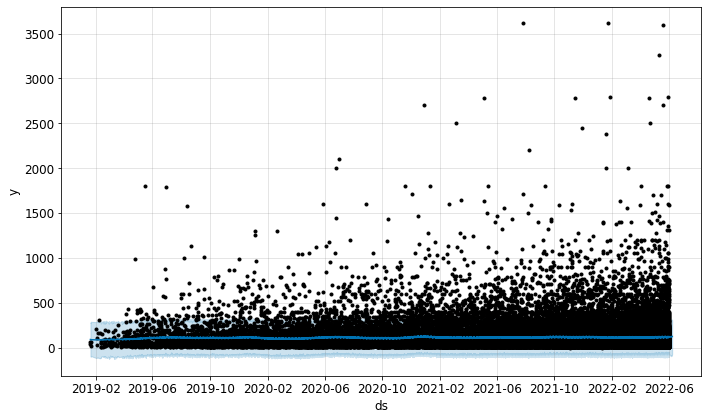

In [ ]:
plot1 = prophet_model.plot(forecast)

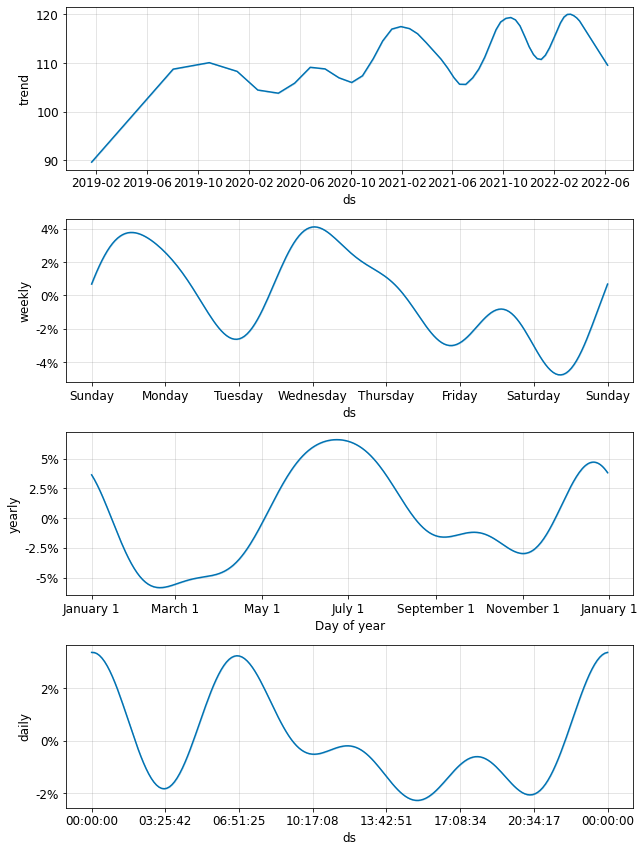

In [ ]:
fig = prophet_model.plot_components(forecast)

In [ ]:
forecast_data = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_data

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-20 11:29:34,91.320496,-78.804909,278.722527
1,2019-01-20 12:06:13,91.369144,-98.782392,274.410582
2,2019-01-21 12:27:31,87.195581,-102.274707,288.881199
3,2019-01-22 13:51:12,88.060089,-96.112698,287.384806
4,2019-02-01 22:37:53,85.676299,-116.932689,283.929404
...,...,...,...,...
44310,2022-06-03 23:54:38,116.971121,-81.838037,294.990673
44311,2022-06-04 23:54:38,120.919926,-96.843749,310.460354
44312,2022-06-05 23:54:38,122.993803,-86.518931,315.628415
44313,2022-06-06 23:54:38,117.227445,-91.791391,314.109716


In [ ]:
prop_merge = pd.merge(data_prop,forecast[['ds','yhat','yhat_lower','yhat_upper']],on='ds')
prop_merge = prop_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
prop_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2019-01-20 11:29:34,-78.804909,278.722527,91.320496,34.99
1,2019-01-20 12:06:13,-98.782392,274.410582,91.369144,59.50
2,2019-01-21 12:27:31,-102.274707,288.881199,87.195581,65.00
3,2019-01-22 13:51:12,-96.112698,287.384806,88.060089,20.21
4,2019-02-01 22:37:53,-116.932689,283.929404,85.676299,205.80


In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(prophet_model,
                         initial='730 days',period='180 days',
                         horizon='365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2021-05-31 23:54:38 and 2021-05-31 23:54:38


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,60 days 23:49:23,24039.597907,155.047083,86.283510,1.753617,0.764559,0.772173,0.923476
1,61 days 00:04:06,24036.486799,155.037050,86.254775,1.752433,0.764516,0.771776,0.923476
2,61 days 00:08:04,24036.880774,155.038320,86.264675,1.752633,0.764516,0.771925,0.923476
3,61 days 00:29:58,24034.809194,155.031639,86.252273,1.751865,0.764516,0.771836,0.923476
4,61 days 00:38:03,24033.903812,155.028719,86.245536,1.752374,0.764559,0.772002,0.923476


In [ ]:
prop_true = prop_merge['y']
prop_pred = prop_merge['yhat']

In [ ]:
print('the Mean Absolute Error of prophet model ', mean_absolute_error(prop_true,prop_pred).round(3))
print('the Mean Absolute Percentage Error of prophet model ', mean_absolute_percentage_error(prop_true,prop_pred).round(3),'%')
print('the Mean Squared Error of prophet model ', mean_squared_error(prop_true,prop_pred).round(3))
print('the Root Mean Square Error of prophet model ', np.sqrt(mean_squared_error(prop_true,prop_pred)).round(3))

the Mean Absolute Error of prophet model  88.515
the Mean Absolute Percentage Error of prophet model  2.03 %
the Mean Squared Error of prophet model  23312.722
the Root Mean Square Error of prophet model  152.685
